## Chairman's Census

- **FFXIV**: The Chairman, Excalibur
- **Mastodon/Fediverse**: @jimpjorps@knzk.me
- **Twitter**: @jimpjorps
- **Discord**: jimpjorps#0001 
 

In [1]:
# Necessary packages

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

import matplotlib.pyplot as plt
import numpy as npt
import requests
from collections import Counter
import pandas as pd
from tqdm import tqdm

In [9]:
# If you've got an XIVAPI developer key, insert it here
# This notebook will work without a key, it'll just be slightly slower

xivapi_key = ""
url_base = "https://xivapi.com"

In [13]:
# Look up the FC's ID number
# If this step doesn't work because you have a common or hard-to-search-for FC name,
# set fc_id directly

fc_name = "Please Be Careful"
server_name = "Excalibur"
payload = {
    "name": fc_name,
    "server": server_name
}

if xivapi_key:
    payload["private_key"] = xivapi_key
    
r = requests.post(url_base + "/freecompany/search", json=payload)
fc_id = r.json()['Results'][0]['ID']
fc_id

'9228860798900633743'

In [15]:
# Retrieve the character IDs of everyone in this FC
# Show the first 10 IDs to check

payload = {
    "data": "FCM",
    "columns": "FreeCompanyMembers.data.*.ID"
}

if xivapi_key:
    payload["private_key"] = xivapi_key

r = requests.post(url_base + "/freecompany/" + fc_id, json=payload)
members_data = r.json()['FreeCompanyMembers']['data']
members_id = [i['ID'] for i in members_data]

members_id[0:9]

[1608151,
 11463785,
 13334473,
 8010248,
 8971379,
 2265699,
 1534611,
 7721079,
 18313684]

In [4]:
# Define the lists of races, tribes and genders to convert the provided 
# indices into readable text, as well as to make using pandas easier

census_list = []
races = [
    "Unknown",
    "Hyur",
    "Elezen",
    "Lalafell",
    "Miqote",
    "Roegadyn",
    "Au Ra"
]
tribes = [
    "Unknown",
    "Midlander",
    "Highlander",
    "Wildwood",
    "Duskwight",
    "Plainsfolk",
    "Dunesfolk",
    "Seeker",
    "Keeper",
    "Sea Wolf",
    "Hellsguard",
    "Raen",
    "Xaela"
]
genders = [
    "Unknown",
    "M",
    "F"
]

In [16]:
# Request the race/tribe/gender indices for each character
# Make a list of tuplets

census_list = []

payload = {
    "columns": "Character.Race,Character.Tribe,Character.Gender"
}

if xivapi_key:
    payload["private_key"] = xivapi_key
    
for id in tqdm(members_id):
    r = requests.post(url_base + "/character/" + str(id), json=payload)
    datum = [
        races[int(r.json()['Character']['Race'] or 0)],
        tribes[int(r.json()['Character']['Tribe'] or 0)],
        genders[int(r.json()['Character']['Gender'] or 0)]
    ]
    census_list.append(datum)
    
census_list

100%|██████████| 183/183 [01:10<00:00,  3.21it/s]


[['Elezen', 'Duskwight', 'F'],
 ['Hyur', 'Highlander', 'F'],
 ['Lalafell', 'Plainsfolk', 'M'],
 ['Hyur', 'Midlander', 'F'],
 ['Roegadyn', 'Sea Wolf', 'F'],
 ['Miqote', 'Keeper', 'F'],
 ['Miqote', 'Keeper', 'F'],
 ['Elezen', 'Wildwood', 'F'],
 ['Miqote', 'Seeker', 'F'],
 ['Lalafell', 'Dunesfolk', 'F'],
 ['Hyur', 'Midlander', 'F'],
 ['Hyur', 'Highlander', 'F'],
 ['Hyur', 'Midlander', 'F'],
 ['Hyur', 'Midlander', 'F'],
 ['Miqote', 'Seeker', 'M'],
 ['Elezen', 'Duskwight', 'F'],
 ['Lalafell', 'Dunesfolk', 'M'],
 ['Au Ra', 'Raen', 'F'],
 ['Au Ra', 'Raen', 'F'],
 ['Miqote', 'Keeper', 'F'],
 ['Au Ra', 'Xaela', 'F'],
 ['Au Ra', 'Xaela', 'F'],
 ['Hyur', 'Highlander', 'F'],
 ['Hyur', 'Midlander', 'M'],
 ['Au Ra', 'Raen', 'F'],
 ['Miqote', 'Seeker', 'F'],
 ['Hyur', 'Highlander', 'M'],
 ['Au Ra', 'Raen', 'F'],
 ['Au Ra', 'Xaela', 'F'],
 ['Miqote', 'Seeker', 'M'],
 ['Elezen', 'Wildwood', 'M'],
 ['Hyur', 'Highlander', 'F'],
 ['Elezen', 'Duskwight', 'M'],
 ['Miqote', 'Keeper', 'F'],
 ['Roegadyn', 'Hel

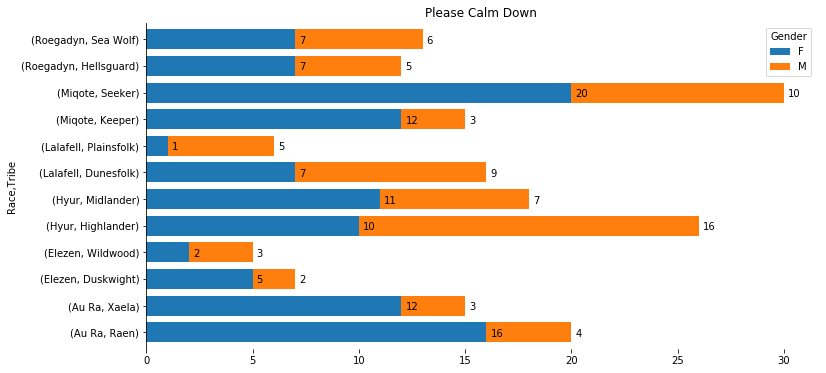

In [17]:
# Turn the list of tuples into a pandas DataFrame
# Make a pivot table that summarizes by count

df = pd.DataFrame(
    census_list,
    columns=["Race", "Tribe", "Gender"]
)
pt = pd.pivot_table(
    df, 
    index=['Race','Tribe'], 
    columns=['Gender'],
    aggfunc=len,
    fill_value=0,
)
ax = pt.plot.barh(
    figsize=[12, 6],
    stacked=True,
    table=False,
    width=0.75,
    title=fc_name
)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(4, 6), textcoords='offset points')
ax.set_facecolor('white')
ax.patch.set_alpha(1)

In [18]:
# Generate a pivot table showing the demographic breakdown with subtotals

pt = pd.pivot_table(df, 
                    index=['Race','Tribe'], 
                    columns=['Gender'],
                    aggfunc=len,
                    fill_value=0,
                    margins=True
                   )
pt

Gender                 F   M  All
Race     Tribe                   
Au Ra    Raen         16   4   20
         Xaela        12   3   15
Elezen   Duskwight     5   2    7
         Wildwood      2   3    5
Hyur     Highlander   10  16   26
         Midlander    11   7   18
Lalafell Dunesfolk     7   9   16
         Plainsfolk    1   5    6
Miqote   Keeper       12   3   15
         Seeker       20  10   30
Roegadyn Hellsguard    7   5   12
         Sea Wolf      7   6   13
All                  110  73  183